<a href="https://colab.research.google.com/github/luisfernandorios/Actividades_Aprendizaje-/blob/main/Semana6_IBM_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATA ANALYSIS WITH PYTHON
#Semana 6
#Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway,pearsonr
from scipy import stats

In [ ]:
path='https://raw.githubusercontent.com/luisfernandorios/Actividades_Aprendizaje-/main/imports-85.data'
df= pd.read_csv(path,sep=',',header=None)
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df=df.replace('?',np.NaN)
df=df.dropna(subset=['price'],axis=0)
df['price']=df['price'].astype('int64')

In [ ]:
drive_wheels_counts=df['drive-wheels'].value_counts()
drive_wheels_counts.rename({'drive-wheels':'value_counts'}, axis=1, inplace=True)

In [ ]:
drive_wheels_counts


fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

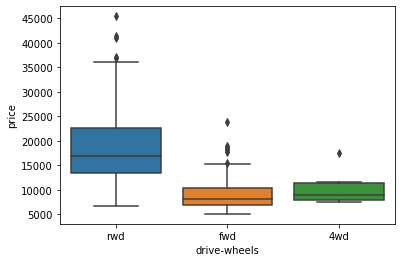

In [ ]:
sns.boxplot(x='drive-wheels',y='price',data=df)

Text(0.5, 1.0, 'SCATTER PLOT OF ENGINE SIZE VS PRICE')

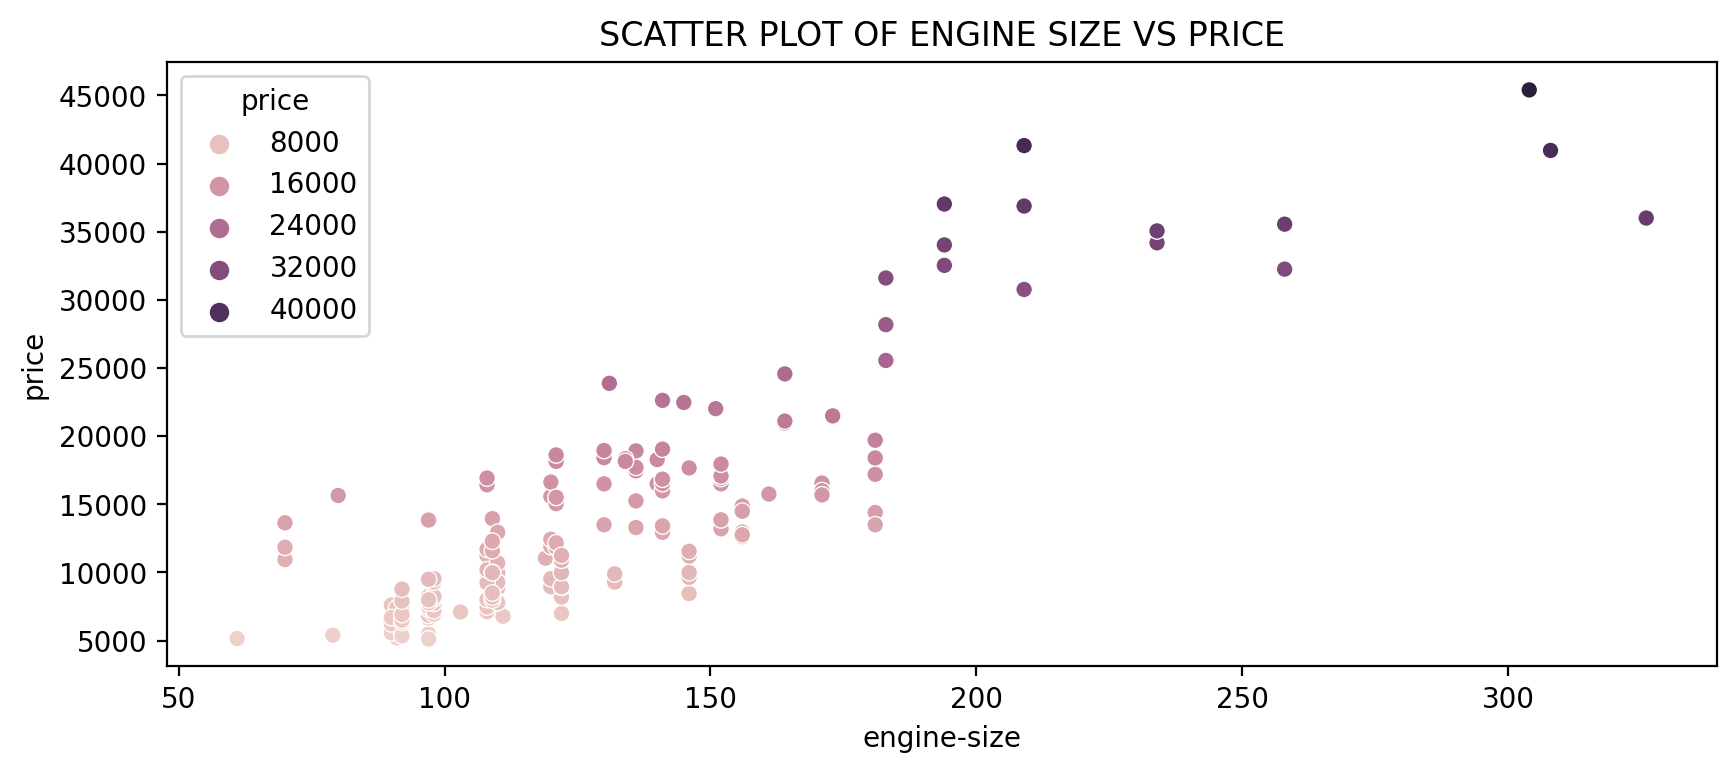

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='engine-size', y='price', data=df, hue='price')
plt.title('SCATTER PLOT OF ENGINE SIZE VS PRICE')

In [ ]:
df_test=df[['drive-wheels','body-style','price']]
df_grp=df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()

In [ ]:
df_grp.sort_values('price')

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
2,4wd,wagon,9095.750000
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
3,fwd,convertible,11595.000000
1,4wd,sedan,12647.333333
10,rwd,hatchback,14337.777778
12,rwd,wagon,16994.222222


In [ ]:
df_pivot=df_grp.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<AxesSubplot:xlabel='None-body-style', ylabel='drive-wheels'>

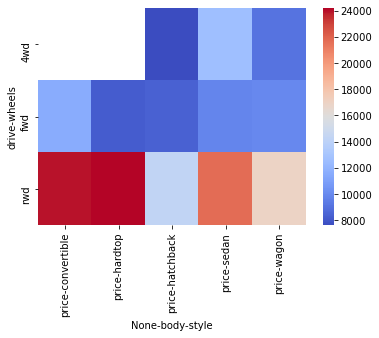

In [ ]:
sns.heatmap(df_pivot,cmap='coolwarm')

In [ ]:
df_anova=df[['make','price']]
grp_anova=df_anova.groupby(['make'])

In [ ]:
hond_grp=(grp_anova.get_group('honda'))
hond_grp

,make,price
30,honda,6479
31,honda,6855
32,honda,5399
33,honda,6529
34,honda,7129
35,honda,7295
36,honda,7295
37,honda,7895
38,honda,9095
39,honda,8845


In [ ]:
sub_grp=(grp_anova.get_group('subaru'))
sub_grp

,make,price
138,subaru,5118
139,subaru,7053
140,subaru,7603
141,subaru,7126
142,subaru,7775
143,subaru,9960
144,subaru,9233
145,subaru,11259
146,subaru,7463
147,subaru,10198


In [ ]:
anova_res=f_oneway(hond_grp['price'],sub_grp['price'])
anova_res

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

(0.0, 53702.135121524174)

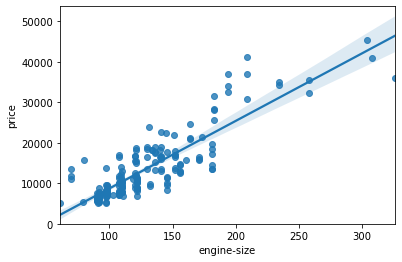

In [ ]:
sns.regplot(x='engine-size',y='price',data=df)
plt.ylim(0,)

(0.0, 48184.77159968567)

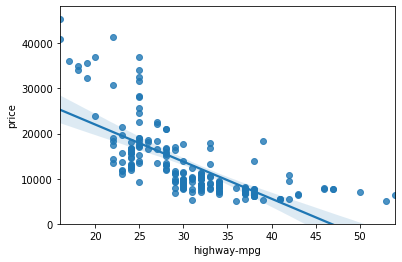

In [ ]:
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

(array([4000., 4500., 5000., 5500., 6000., 6500., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

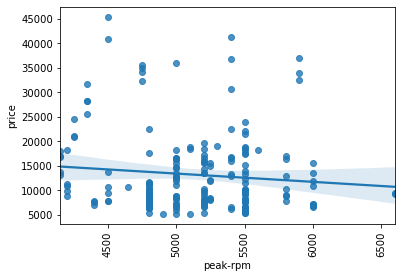

In [ ]:
df['peak-rpm'] = df['peak-rpm'].astype('float')
sns.regplot(x='peak-rpm',y='price',data=df)
#plt.ylim(0,)
plt.xticks(rotation=90)

In [ ]:
df=df.dropna(subset=['horsepower'],axis=0)
df['horsepower'] = df['horsepower'].astype('float')
pearson_oef,p_val=stats.pearsonr(df['horsepower'],df['price'])

In [ ]:
pearson_oef

0.8105330821322063

In [ ]:
p_val

1.1891278276946466e-47

<AxesSubplot:>

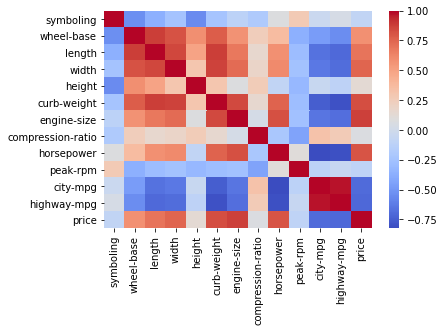

In [ ]:
sns.heatmap(df.corr('pearson'),cmap='coolwarm')

In [ ]:
print("The Pearson Correlation Coefficient is", pearson_oef, " with a P-value of P =", p_val)

The Pearson Correlation Coefficient is 0.8105330821322063  with a P-value of P = 1.1891278276946466e-47


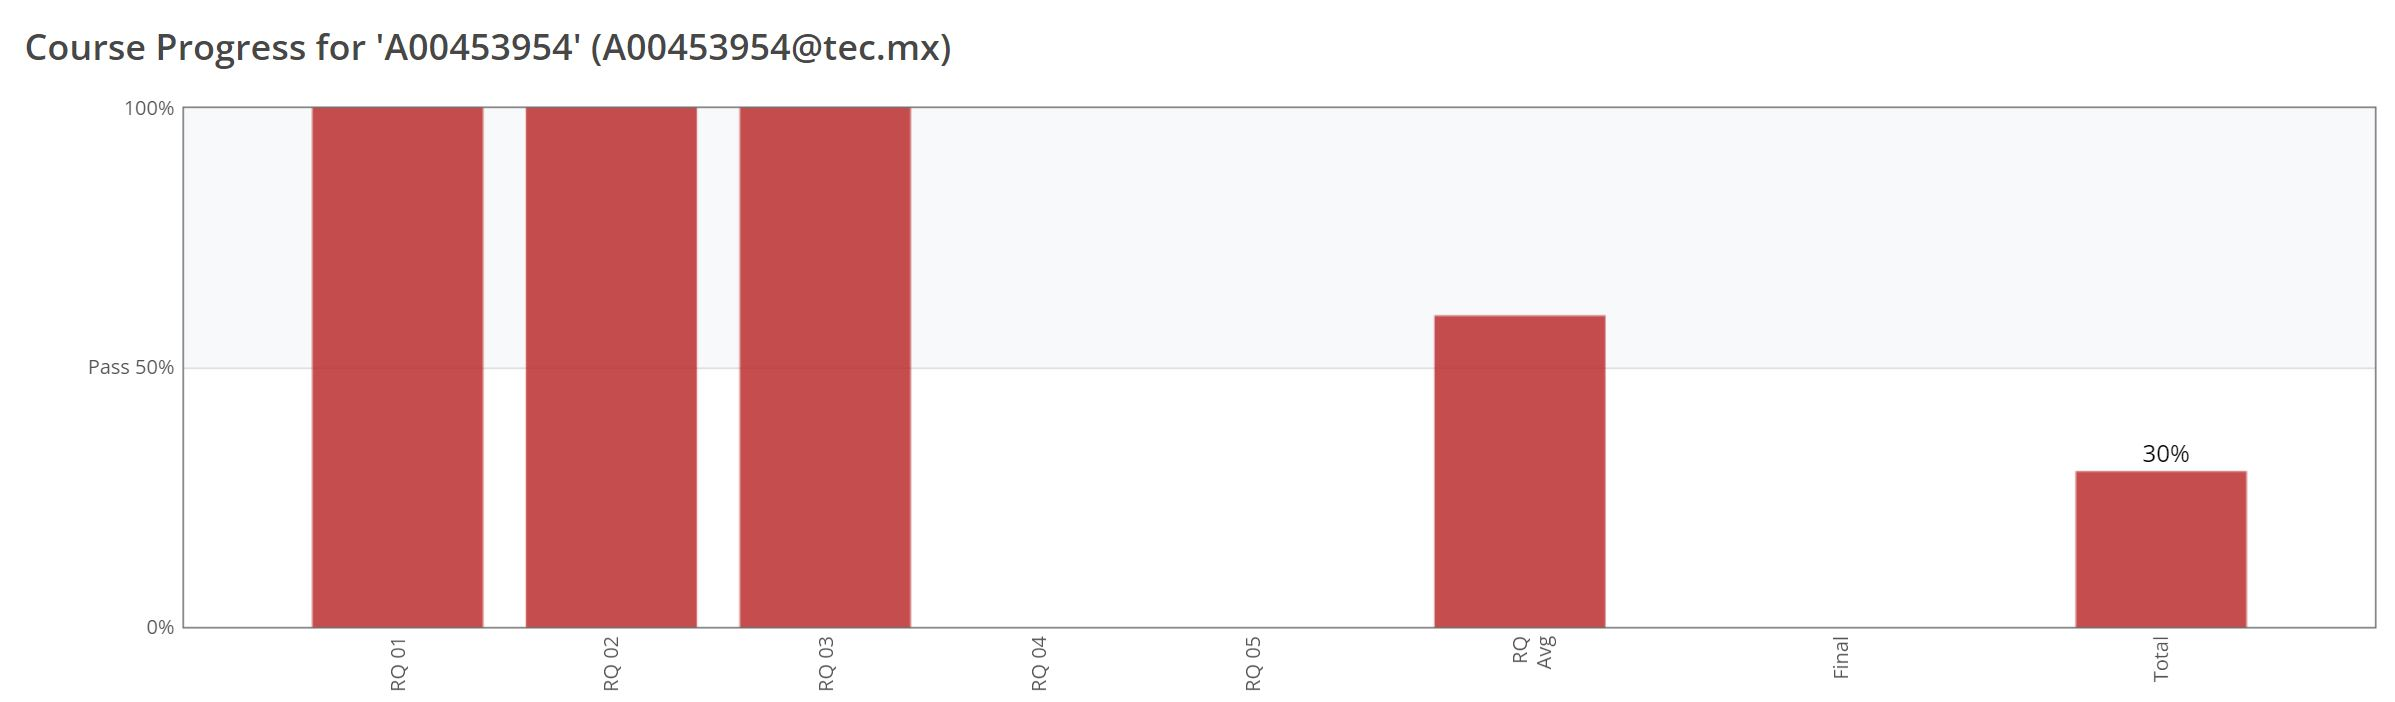

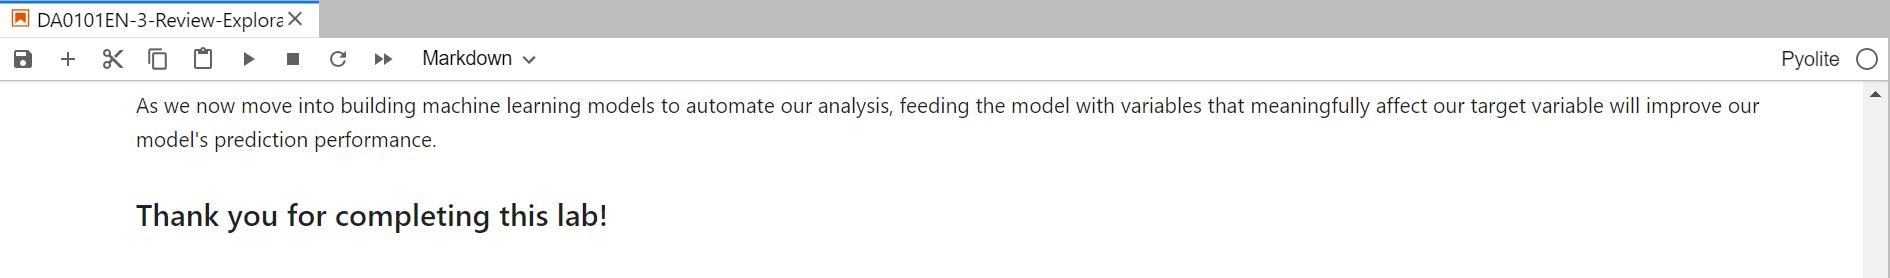